# Construindo e Salvando um Modelo

Utilizando o conjunto de dados das [Flores Iris](https://archive.ics.uci.edu/ml/datasets/iris)

Iniciamos importando as bibliotecas básicas necessárias

In [1]:
import numpy as np
import pandas as pd

Carregamos e observamos os dados

In [2]:
iris = pd.read_csv('Dados/iris.csv')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


A variável **X** são as features que utilizaremos para prever a respectiva flor.

Eliminamos a coluna 'species', que é nosso *target*.

In [4]:
X = iris.drop('species',axis=1)

In [6]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


A variável **y** é o nosso *target*, a espécie da flor que desejamos prever.

In [5]:
y = iris['species']

In [7]:
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

A função **unique()** nos retorna os valores únicos da coluna **y**

Estamos lidando com 3 espécies:

- setosa
- versicolor
- virginica

In [8]:
y.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

Vamos agora utilizar o **LabelBinarizer** para codificar cada espécie

Setosa por exemplo será **[1, 0, 0]**

In [9]:
from sklearn.preprocessing import LabelBinarizer

In [10]:
encoder = LabelBinarizer()

In [13]:
y = encoder.fit_transform(y)
y[:10]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=int64)

Dividimos os dados em Train/Test

E utilizamos o **MinMaxScaler** para fazer o *scaling* dos dados

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [16]:
scaler = MinMaxScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

Construímos o nosso Modelo

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [18]:
model = Sequential()
model.add(Dense(units=4,activation='relu',input_shape=[4,]))
model.add(Dense(units=3,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 20        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 15        
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


Treinamos o nosso Modelo

In [19]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(patience=10)

In [20]:
model.fit(x=scaled_X_train,y=y_train,epochs=300,validation_data=(scaled_X_test,y_test),callbacks=[early_stop])

Epoch 1/300
4/4 [==============================] - 0s 113ms/step - loss: 1.2999 - accuracy: 0.2333 - val_loss: 1.2575 - val_accuracy: 0.2333
Epoch 2/300
4/4 [==============================] - 0s 8ms/step - loss: 1.2920 - accuracy: 0.2250 - val_loss: 1.2531 - val_accuracy: 0.2333
Epoch 3/300
4/4 [==============================] - 0s 37ms/step - loss: 1.2832 - accuracy: 0.2250 - val_loss: 1.2489 - val_accuracy: 0.2333
Epoch 4/300
4/4 [==============================] - 0s 36ms/step - loss: 1.2755 - accuracy: 0.2250 - val_loss: 1.2448 - val_accuracy: 0.2333
Epoch 5/300
4/4 [==============================] - 0s 44ms/step - loss: 1.2681 - accuracy: 0.2250 - val_loss: 1.2410 - val_accuracy: 0.2333
Epoch 6/300
4/4 [==============================] - 0s 31ms/step - loss: 1.2605 - accuracy: 0.2250 - val_loss: 1.2371 - val_accuracy: 0.2333
Epoch 7/300
4/4 [==============================] - 0s 23ms/step - loss: 1.2534 - accuracy: 0.2250 - val_loss: 1.2335 - val_accuracy: 0.2333
Epoch 8/300
4/4 [===

Visualizamos o desempenho de nosso Modelo

In [24]:
metrics = pd.DataFrame(model.history.history)

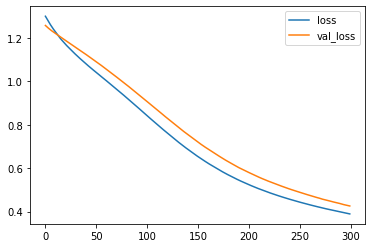

In [25]:
metrics[['loss','val_loss']].plot()

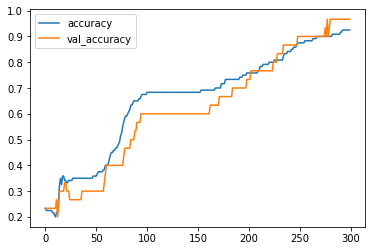

In [26]:
metrics[['accuracy','val_accuracy']].plot()

In [27]:
model.evaluate(scaled_X_test,y_test,verbose=0)

[0.42613890767097473, 0.9666666388511658]

Construímos agora um novo Modelo e treinamos ele em todos os dados do *dataset*

In [28]:
epochs = len(metrics)
scaled_X = scaler.fit_transform(X)

In [29]:
model = Sequential()
model.add(Dense(units=4,activation='relu',input_shape=[4,]))
model.add(Dense(units=3,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 15        
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.fit(scaled_X,y,epochs=epochs)

Epoch 1/300
5/5 [==============================] - 0s 2ms/step - loss: 1.0001 - accuracy: 0.3333
Epoch 2/300
5/5 [==============================] - 0s 5ms/step - loss: 0.9935 - accuracy: 0.3333
Epoch 3/300
5/5 [==============================] - 0s 7ms/step - loss: 0.9877 - accuracy: 0.3333
Epoch 4/300
5/5 [==============================] - 0s 7ms/step - loss: 0.9814 - accuracy: 0.3333
Epoch 5/300
5/5 [==============================] - 0s 4ms/step - loss: 0.9757 - accuracy: 0.3333
Epoch 6/300
5/5 [==============================] - 0s 6ms/step - loss: 0.9699 - accuracy: 0.3333
Epoch 7/300
5/5 [==============================] - 0s 6ms/step - loss: 0.9640 - accuracy: 0.3333
Epoch 8/300
5/5 [==============================] - 0s 3ms/step - loss: 0.9587 - accuracy: 0.3333
Epoch 9/300
5/5 [==============================] - 0s 5ms/step - loss: 0.9532 - accuracy: 0.3333
Epoch 10/300
5/5 [==============================] - 0s 6ms/step - loss: 0.9481 - accuracy: 0.3333
Epoch 11/300
5/5 [===========

Salvamos o modelo para uso futuro

In [31]:
model.save('iris_model.h5')

Salvamos o nosso scaler para uso futoro

In [32]:
import joblib

joblib.dump(scaler,'iris_scaler.pkl')

['iris_scaler.pkl']

Carregamos nosso Modelo e o Scaler para teste

In [33]:
from tensorflow.keras.models import load_model

In [34]:
flower_model = load_model('iris_model.h5')
flower_scaler = joblib.load('iris_scaler.pkl')

In [35]:
flower_example = {
    "sepal_length":5.1,
    "sepal_width":3.5,
    "petal_length":1.4,
    "petal_width":0.2
}

In [47]:
def return_prediction(model, scaler, sample_json):
    """
    Função return_prediction
    Recebe um modelo, um scaler 
    e um dicionário representando uma amostra
    Retorna uma previsão
    """
    s_len = sample_json["sepal_length"]
    s_wid = sample_json["sepal_width"]
    p_len = sample_json["petal_length"]
    p_wid = sample_json["petal_width"]
    
    flower = [[s_len,s_wid,p_len,p_wid]]
    classes = np.array(['setosa','versicolor','virginica'])
    flower = scaler.transform(flower)
    class_index = np.argmax(model.predict(flower), axis=-1)[0]
    return classes[class_index]

In [48]:
return_prediction(flower_model,flower_scaler,flower_example)

'setosa'

# Código para Deployment

In [50]:
from tensorflow.keras.models import load_model
import numpy as np
import joblib

flower_model = load_model('iris_model.h5')
flower_scaler = joblib.load('iris_scaler.pkl')

def return_prediction(model, scaler, sample_json):
    s_len = sample_json["sepal_length"]
    s_wid = sample_json["sepal_width"]
    p_len = sample_json["petal_length"]
    p_wid = sample_json["petal_width"]
    
    flower = [[s_len,s_wid,p_len,p_wid]]
    classes = np.array(['setosa','versicolor','virginica'])
    flower = scaler.transform(flower)
    class_index = np.argmax(model.predict(flower), axis=-1)[0]
    return classes[class_index]